# h5py

## 写
把一个目录的两张图片写入一个h5文件的dataset里

In [7]:
import cv2
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
    
def get_cats_file_list(dir):
    cats_dir = os.walk(dir)
    cats_file_list = []
    for path,dir_list,file_list in cats_dir:
        for file in file_list:
            cats_file_list.append("{}/{}".format(dir,file))
    print("cats file list is:{}".format(cats_file_list))
    return cats_file_list

cats_file_list = get_cats_file_list("cats")

cats file list is:['cats/cat1.jpg', 'cats/cat2.jpg']


In [8]:
def get_image_shape(image_file):
    return cv2.imread(image_file).shape

print(get_image_shape(cats_file_list[0]))


(392, 555, 3)


In [10]:
def read_image(file_list):
    image_shape = get_image_shape(file_list[0])
    dataset = np.empty(shape=((len(file_list),)+image_shape),dtype=np.uint8)
    print("dataset shape is {}".format(dataset.shape))
    i = 0
    for file in file_list:
        dataset[i] = cv2.imread(file)
        i += 1
#     print("dataset is {}".format(dataset))
    return dataset
dataset = read_image(cats_file_list)
dataset

dataset shape is (2, 392, 555, 3)


array([[[[131, 142, 146],
         [131, 142, 146],
         [131, 142, 146],
         ...,
         [123, 135, 139],
         [123, 135, 139],
         [123, 135, 139]],

        [[131, 142, 146],
         [131, 142, 146],
         [131, 142, 146],
         ...,
         [123, 135, 139],
         [123, 135, 139],
         [123, 135, 139]],

        [[131, 142, 146],
         [131, 142, 146],
         [131, 142, 146],
         ...,
         [123, 135, 139],
         [123, 135, 139],
         [123, 135, 139]],

        ...,

        [[188, 206, 223],
         [188, 206, 223],
         [188, 206, 223],
         ...,
         [168, 185, 194],
         [168, 185, 194],
         [169, 186, 195]],

        [[187, 205, 222],
         [187, 205, 222],
         [187, 205, 222],
         ...,
         [171, 188, 197],
         [172, 189, 198],
         [173, 190, 199]],

        [[187, 205, 222],
         [187, 205, 222],
         [187, 205, 222],
         ...,
         [176, 193, 202],
        

In [12]:
with h5py.File("cats.h5", "w") as f:
    f.create_dataset("cats", data=dataset)

## 读

读一个h5中的一个dateset的两张图片，并且把图片画出来

cats dataset shape (2, 392, 555, 3)


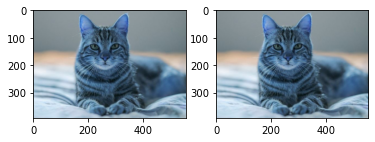

In [14]:
with h5py.File("cats.h5", "r") as f:
    print("cats dataset shape {}".format(f["cats"].shape))
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(f["cats"][0])
    plt.subplot(1,2,2)
    plt.imshow(f["cats"][1])